In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind, f_oneway

## Exploratory Data Analysis (EDA)

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,1970,102.646851,11.34891,24.906189,36.178889,294.3722,43.017559,47.831994,16.072307,13.641821,...,9.353695,77.901472,358.910969,24.392285,5.538241,86.621684,44.763398,76.973781,88.185792,18.594275
2,1971,98.461114,12.636423,26.998731,35.091287,305.833367,43.59169,45.894756,15.92952,11.877081,...,9.300113,76.331326,375.778078,25.511077,5.493952,87.421056,46.125536,78.00654,84.770002,18.786527
3,1972,104.932504,13.420588,30.179241,37.189109,312.722261,47.467615,47.215575,16.013802,11.305789,...,9.678573,86.988554,398.160826,25.779459,5.772615,88.681519,52.29958,89.011773,84.260328,21.663917
4,1973,109.563135,12.490564,34.44872,40.829866,329.285277,51.067649,48.576991,17.243519,11.850216,...,9.446069,98.646675,434.669916,28.243561,5.927384,89.568349,57.415109,97.601594,85.44353,23.687781
5,1974,108.777543,12.77911,36.737072,39.112512,304.471018,50.480507,45.425744,16.657406,9.849325,...,9.16316,90.295826,427.355095,29.613769,5.30714,84.982264,53.146294,100.31438,82.063461,23.898776
6,1975,107.779346,14.524477,38.221132,36.365524,311.485516,51.801656,41.688093,15.543109,7.889702,...,10.889713,89.69407,406.649966,31.001713,5.171217,81.168202,54.893145,97.835074,80.810456,25.335515
7,1976,108.089155,15.969357,43.777153,38.857529,326.902403,55.134964,43.432917,16.15703,7.69028,...,12.4794,101.987939,422.052596,30.763057,5.871174,86.110986,54.933672,104.165409,84.122874,30.859601
8,1977,111.683852,17.950301,50.500706,41.649053,354.482753,58.314615,43.051435,16.139793,7.922854,...,12.298986,102.4575,461.131555,31.969825,5.834698,87.39091,60.124671,102.945133,87.194246,36.282123
9,1978,106.629516,19.482875,49.284884,42.418586,345.243293,58.444211,43.969455,16.183481,7.450239,...,12.906775,104.217412,492.48828,34.105808,5.801661,84.738892,58.925803,96.684611,88.622082,37.123974
10,1979,111.55221,17.473269,56.146724,40.245931,362.068049,58.894585,42.014653,17.077238,6.045275,...,12.690947,101.762393,512.302095,36.683561,5.354668,89.514837,61.810888,100.940577,88.328763,42.005848


In [2]:
data = pd.read_csv('annual-co2-emissions-usa (1).csv')

data.columns = [
    "Year", 
    "Coal CO2 Emissions", 
    "Natural Gas CO2 Emissions", 
    "Aviation Gasoline CO2 Emissions", 
    "Distillate Fuel Oil CO2 Emissions", 
    "Hydrocarbon Gas Liquids CO2 Emissions", 
    "Jet Fuel CO2 Emissions", 
    "Kerosene CO2 Emissions", 
    "Lubricants CO2 Emissions", 
    "Motor Gasoline CO2 Emissions", 
    "Petroleum Coke CO2 Emissions", 
    "Residual Fuel Oil CO2 Emissions", 
    "Other Petroleum Products CO2 Emissions", 
    "Petroleum Excluding Biofuels CO2 Emissions", 
    "Total Energy CO2 Emissions (MMT)"
]

data = data.iloc[1:].reset_index(drop=True)

# Convert the Year column to numeric, setting errors='coerce' will turn non-numeric values to NaN
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Filter the data for the years 2018 to 2022 and keep only the 'Year' and 'Total Energy CO2 Emissions' columns
filtered_data = data[(data['Year'] >= 2018) & (data['Year'] <= 2022)][['Year', 'Total Energy CO2 Emissions (MMT)']]

# Convert 'Total Energy CO2 Emissions' to numeric
filtered_data['Total Energy CO2 Emissions (MMT)'] = pd.to_numeric(filtered_data['Total Energy CO2 Emissions (MMT)'], errors='coerce')

filtered_data.reset_index(drop=True, inplace=True)

filtered_data['Year'] = filtered_data['Year'].astype(int)

filtered_data.insert(0, 'Country', 'United States')

# Display the cleaned data
filtered_data

,Country,Year,Total Energy CO2 Emissions (MMT)
0,United States,2018,5278.222
1,United States,2019,5146.993
2,United States,2020,4583.690
3,United States,2021,4905.623
4,United States,2022,4938.516


In [3]:
data_2018 = pd.read_csv('2018-remote-work-data.csv')
data_2019 = pd.read_csv('2019-remote-work-data.csv')
data_2020 = pd.read_csv('2020-remote-work-data.csv')
data_2021 = pd.read_csv('2021-remote-work-data.csv')
data_2022 = pd.read_csv('2022-remote-work-data.csv')

In [4]:
work_from_home_2018 = data_2018[data_2018['Label (Grouping)'] == '\xa0\xa0\xa0\xa0Worked at home:']
work_from_home_2019 = data_2019[data_2019['Label (Grouping)'] == '\xa0\xa0\xa0\xa0Worked from home:']
work_from_home_2020 = data_2020[data_2020['Label (Grouping)'] == '\xa0\xa0\xa0\xa0Worked from home:']
work_from_home_2021 = data_2021[data_2021['Label (Grouping)'] == '\xa0\xa0\xa0\xa0Worked from home:']
work_from_home_2022 = data_2022[data_2022['Label (Grouping)'] == '\xa0\xa0\xa0\xa0Worked from home:']

In [5]:
country = 'United States'

years = [2018, 2019, 2020, 2021, 2022]

total_worked_from_home = [
    work_from_home_2018['United States!!Estimate'].values[0],
    work_from_home_2019['United States!!Estimate'].values[0],
    work_from_home_2020['United States!!Estimate'].values[0],
    work_from_home_2021['United States!!Estimate'].values[0],
    work_from_home_2022['United States!!Estimate'].values[0]
]

formatted_remote_data = pd.DataFrame({
    'Country': [country] * len(years),
    'Year': years,
    'Total Worked From Home': total_worked_from_home
})

formatted_remote_data['Total Worked From Home'] = formatted_remote_data['Total Worked From Home'].str.replace(',', '')

formatted_remote_data['Total Worked From Home'] = formatted_remote_data['Total Worked From Home'].astype(int)

formatted_remote_data['Total Worked From Home (Millions)'] = formatted_remote_data['Total Worked From Home'] / 1_000_000

formatted_remote_data = formatted_remote_data.drop(columns=['Total Worked From Home'])

formatted_remote_data

,Country,Year,Total Worked From Home (Millions)
0,United States,2018,8.094220
1,United States,2019,8.816739
2,United States,2020,23.748392
3,United States,2021,27.336738
4,United States,2022,24.181288


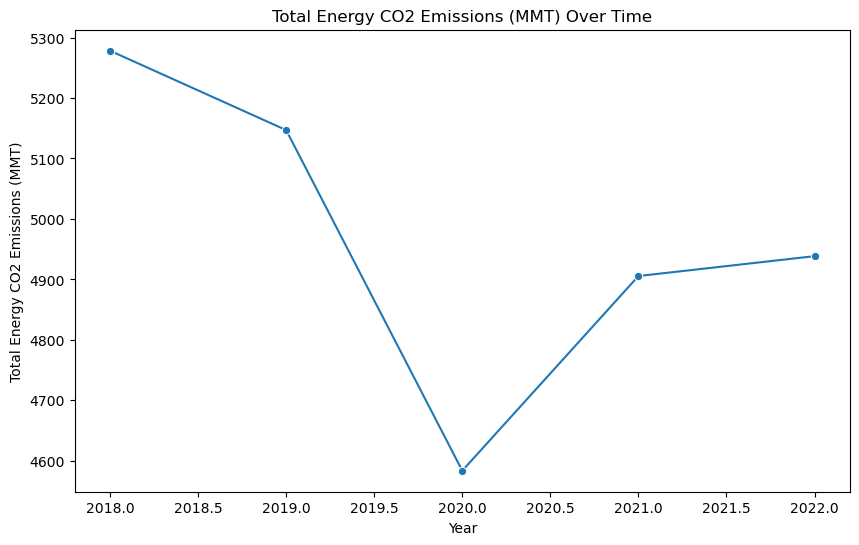

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='Year', y='Total Energy CO2 Emissions (MMT)', marker='o')
plt.title('Total Energy CO2 Emissions (MMT) Over Time')
plt.xlabel('Year')
plt.ylabel('Total Energy CO2 Emissions (MMT)')
plt.show()

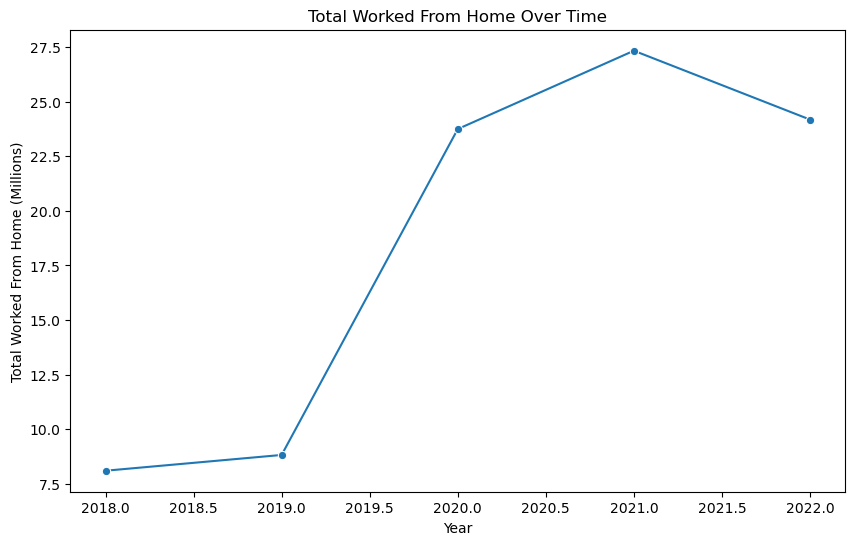

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=formatted_remote_data, x='Year', y='Total Worked From Home (Millions)', marker='o')
plt.title('Total Worked From Home Over Time')
plt.xlabel('Year')
plt.ylabel('Total Worked From Home (Millions)')
plt.show()

## Analysis

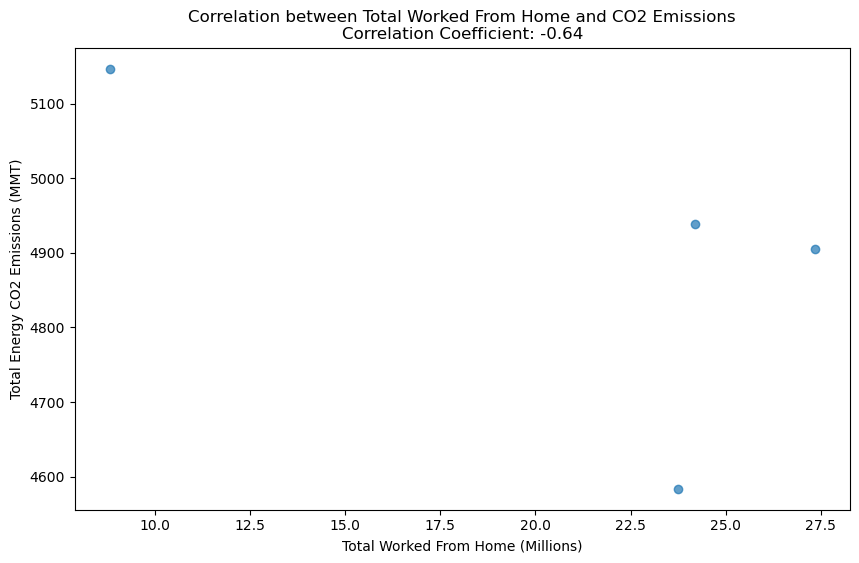

-0.6426967200391381

In [48]:
merged_data = pd.merge(filtered_data, formatted_remote_data, on=['Country', 'Year'])

correlation = merged_data['Total Energy CO2 Emissions (MMT)'].corr(merged_data['Total Worked From Home (Millions)'])

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total Worked From Home (Millions)'], merged_data['Total Energy CO2 Emissions (MMT)'], alpha=0.7)
plt.title(f'Correlation between Total Worked From Home and CO2 Emissions\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Total Worked From Home (Millions)')
plt.ylabel('Total Energy CO2 Emissions (MMT)')
plt.show()

correlation

In [49]:
X = merged_data['Total Worked From Home (Millions)']
Y = merged_data['Total Energy CO2 Emissions (MMT)']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

model.summary()

/Users/nathanko/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Total Energy CO2 Emissions (MMT)   R-squared:                       0.413
Model:                                          OLS   Adj. R-squared:                  0.120
Method:                               Least Squares   F-statistic:                     1.407
Date:                              Thu, 06 Jun 2024   Prob (F-statistic):              0.357
Time:                                      14:31:09   Log-Likelihood:                -25.833
No. Observations:                                 4   AIC:                             55.67
Df Residuals:                                     2   BIC:                             54.44
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              5272.8118    337.679     15.615      0.004    3819.895    6725.729
Total Worked From Home (Millions)   -18.0348     15.202     -1.186      0.357     -83.442      47.372
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.481
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.769
Skew:                          -0.996   Prob(JB):                        0.681
Kurtosis:                       2.195   Cond. No.                         68.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
def standardize(X):
    return (X - X.mean()) / X.std()

residuals = standardize(model.resid)

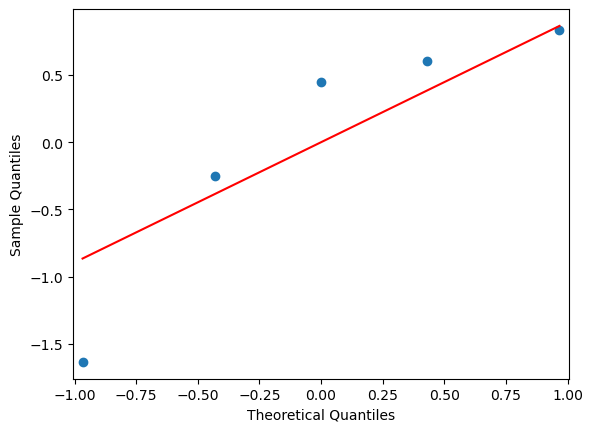

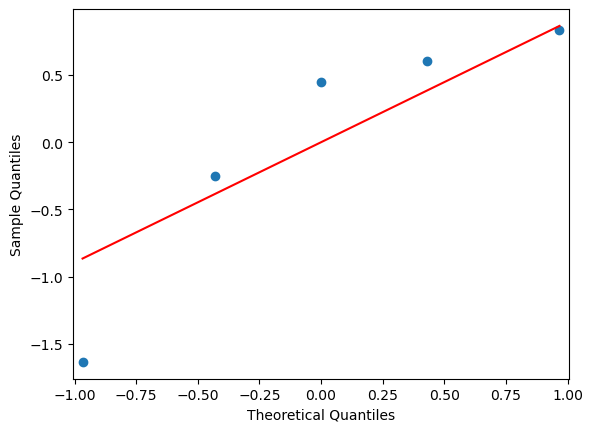

In [50]:
sm.qqplot(residuals, line='s')

In [79]:
merged_data

,Country,Year,Total Energy CO2 Emissions (MMT),Change in CO2 Emissions,Emissions Increased,Total Worked From Home (Millions)
0,United States,2019,5146.993,-131.229,0,8.816739
1,United States,2020,4583.690,-563.303,0,23.748392
2,United States,2021,4905.623,321.933,1,27.336738
3,United States,2022,4938.516,32.893,1,24.181288


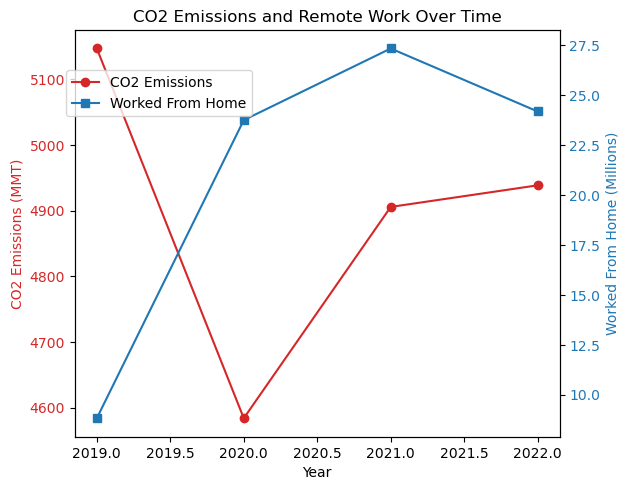

In [51]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plotting CO2 emissions on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (MMT)', color=color)
ax1.plot(merged_data['Year'], merged_data['Total Energy CO2 Emissions (MMT)'], color=color, marker='o', label='CO2 Emissions')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for the number of people working from home
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Worked From Home (Millions)', color=color)
ax2.plot(merged_data['Year'], merged_data['Total Worked From Home (Millions)'], color=color, marker='s', label='Worked From Home')
ax2.tick_params(axis='y', labelcolor=color)

# Adding a title and a legend
fig.tight_layout()
plt.title('CO2 Emissions and Remote Work Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()


In [57]:
Y

0    5146.993
1    4583.690
2    4905.623
3    4938.516
Name: Total Energy CO2 Emissions (MMT), dtype: float64

In [75]:
X = merged_data[['Total Worked From Home (Millions)']][:3]
X

,Total Worked From Home (Millions)
0,8.816739
1,23.748392
2,27.336738


In [67]:
X1 = X['Total Worked From Home (Millions)'][:3]
X1

0     8.816739
1    23.748392
2    27.336738
Name: Total Worked From Home (Millions), dtype: float64

In [70]:
X[:3]


,const,Total Worked From Home (Millions)
0,1.0,8.816739
1,1.0,23.748392
2,1.0,27.336738


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = merged_data[['Total Worked From Home (Millions)']][:3]
y = merged_data['Total Energy CO2 Emissions (MMT)'][:3]   
# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predicting CO2 emissions for 2022 using the model
predicted_2022_emissions = model.predict([[merged_data['Total Worked From Home (Millions)'][3]]])

# Calculate model performance metrics using the actual 2022 data
actual_2022_emissions = merged_data['Total Energy CO2 Emissions (MMT)'][3]
mse = mean_squared_error([actual_2022_emissions], predicted_2022_emissions)
r2 = r2_score([actual_2022_emissions], predicted_2022_emissions)

predicted_2022_emissions[0], actual_2022_emissions, mse, r2


/Users/nathanko/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nathanko/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


(4793.399615275652, 4938.516, 21058.765115464947, nan)

In [74]:
#new stuff
df = pd.read_excel('table1.xlsx').T.reset_index()

df = df.loc[::,3:]
new_header = df.iloc[0]  # Take the first row for the header
df = df[1:]  # Take the data less the header row
df.columns = new_header
df.columns.values[0] = "Year"
df.set_index('Year')
stats = df.iloc[-3:,:]
total_year = df.iloc[:,-3]
df = df.iloc[:-4,:]
df = df.iloc[:,:-3]
df['Year'] = df['Year'].apply(lambda x: int(x))
past_2000 = df.iloc[30:,:]

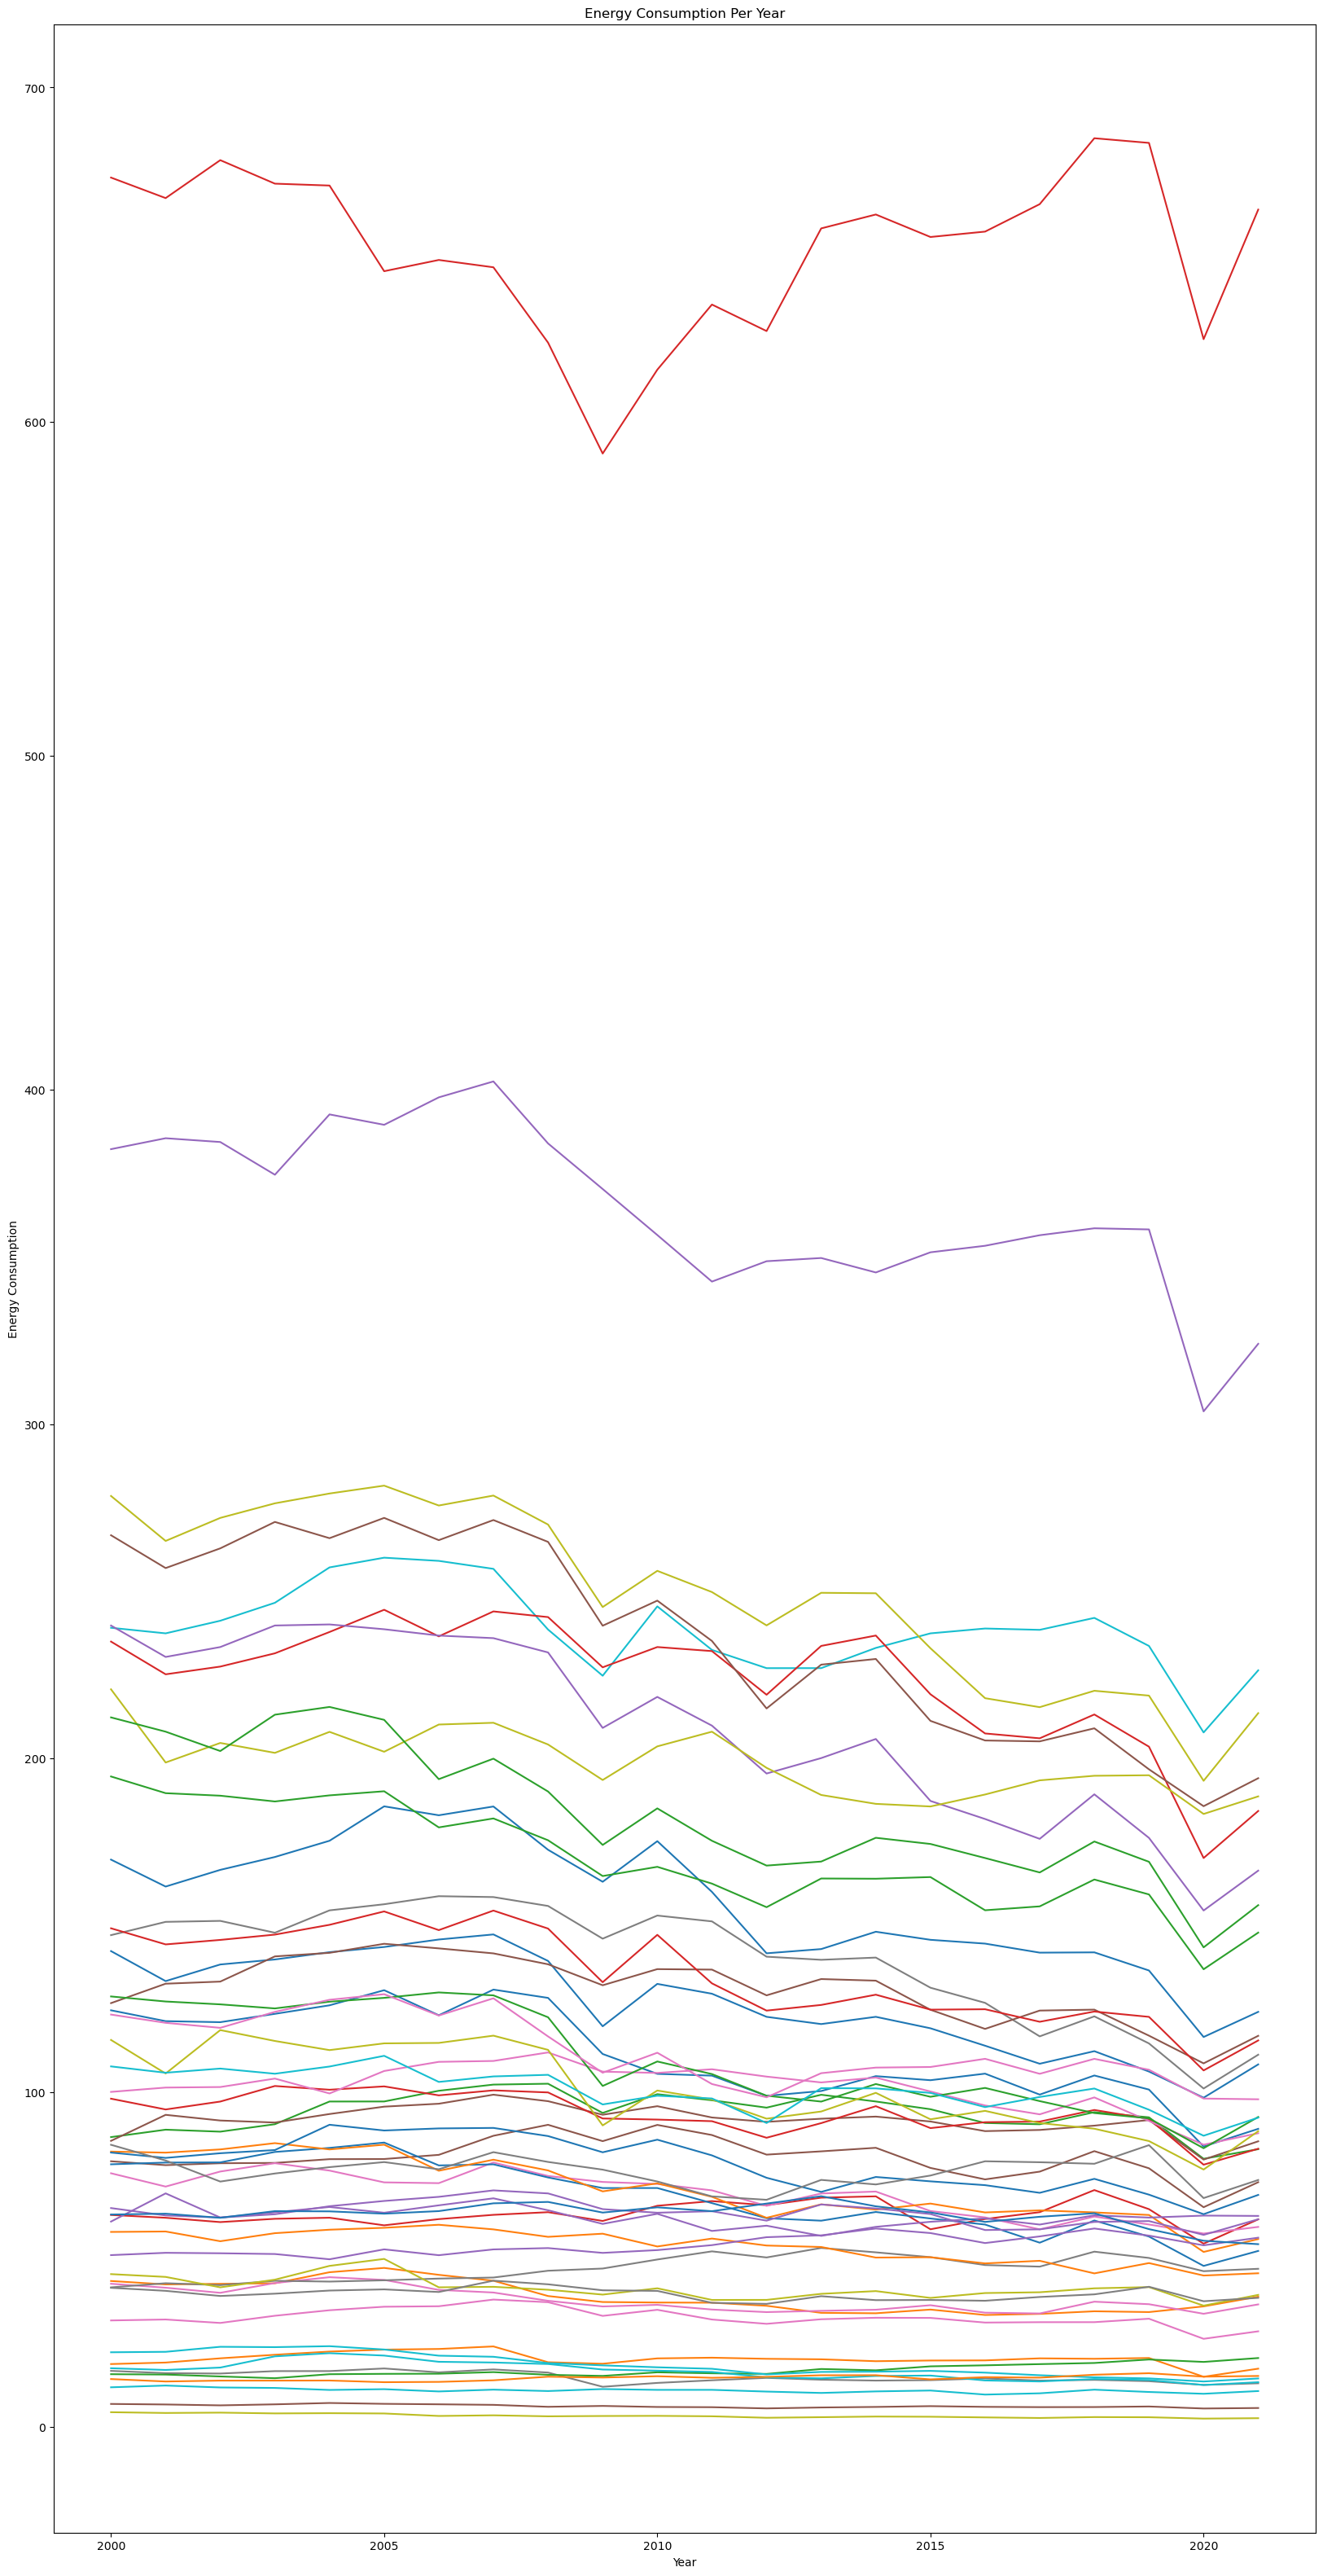

In [83]:
plt.figure(figsize=(20, 40))
for column in past_2000.columns[1:]:
    plt.plot(past_2000.Year, past_2000[column], label=column)

plt.title('Energy Consumption Per Year')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.show()

In [110]:
df.reset_index().iloc[:,3:]

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11.34891,24.906189,36.178889,294.3722,43.017559,47.831994,16.072307,13.641821,104.354245,73.527753,...,9.353695,77.901472,358.910969,24.392285,5.538241,86.621684,44.763398,76.973781,88.185792,18.594275
1,12.636423,26.998731,35.091287,305.833367,43.59169,45.894756,15.92952,11.877081,111.502511,79.568031,...,9.300113,76.331326,375.778078,25.511077,5.493952,87.421056,46.125536,78.00654,84.770002,18.786527
2,13.420588,30.179241,37.189109,312.722261,47.467615,47.215575,16.013802,11.305789,121.679521,86.759904,...,9.678573,86.988554,398.160826,25.779459,5.772615,88.681519,52.29958,89.011773,84.260328,21.663917
3,12.490564,34.44872,40.829866,329.285277,51.067649,48.576991,17.243519,11.850216,132.240486,93.106091,...,9.446069,98.646675,434.669916,28.243561,5.927384,89.568349,57.415109,97.601594,85.44353,23.687781
4,12.77911,36.737072,39.112512,304.471018,50.480507,45.425744,16.657406,9.849325,124.294542,91.691935,...,9.16316,90.295826,427.355095,29.613769,5.30714,84.982264,53.146294,100.31438,82.063461,23.898776
5,14.524477,38.221132,36.365524,311.485516,51.801656,41.688093,15.543109,7.889702,125.938088,91.443886,...,10.889713,89.69407,406.649966,31.001713,5.171217,81.168202,54.893145,97.835074,80.810456,25.335515
6,15.969357,43.777153,38.857529,326.902403,55.134964,43.432917,16.15703,7.69028,134.52024,96.226027,...,12.4794,101.987939,422.052596,30.763057,5.871174,86.110986,54.933672,104.165409,84.122874,30.859601
7,17.950301,50.500706,41.649053,354.482753,58.314615,43.051435,16.139793,7.922854,138.182988,104.698472,...,12.298986,102.4575,461.131555,31.969825,5.834698,87.39091,60.124671,102.945133,87.194246,36.282123
8,19.482875,49.284884,42.418586,345.243293,58.444211,43.969455,16.183481,7.450239,146.101802,106.525319,...,12.906775,104.217412,492.48828,34.105808,5.801661,84.738892,58.925803,96.684611,88.622082,37.123974
9,17.473269,56.146724,40.245931,362.068049,58.894585,42.014653,17.077238,6.045275,153.416194,111.442333,...,12.690947,101.762393,512.302095,36.683561,5.354668,89.514837,61.810888,100.940577,88.328763,42.005848


In [115]:
import seaborn as sns

TypeError: Image data of dtype object cannot be converted to float

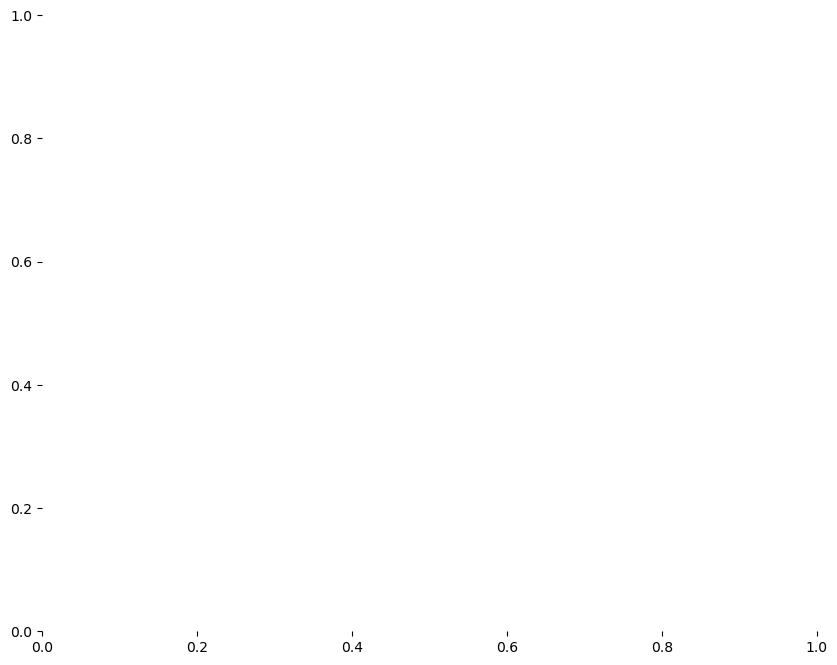

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heat Map of Energy Consumption')
plt.xlabel('States')
plt.ylabel('Time Points')
plt.show()

### Regression Analysis:

- Purpose: To assess the effect of time (and possibly other covariates) on CO2 consumption.
- Methods: Linear regression modeling with year as a predictor.
- Assumptions:
    - Linearity: The relationship between year and CO2 consumption should be linear.
    - Independence of errors: The residuals of the model should be independent.
    - Homoscedasticity: Constant variance of residuals across time.
    - Normality of residuals: The residuals of the regression should be normally distributed.

In [119]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [123]:
past_2000

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
31,2000,142.298577,43.579298,86.640039,63.340678,382.286455,85.51638,42.750767,16.679414,4.313088,...,14.23058,128.727078,673.038576,65.401313,6.784422,123.30906,84.338744,115.71061,107.794425,63.471657
32,2001,133.32195,42.552855,88.861709,62.497584,385.559363,93.301223,41.566124,15.996317,4.08285,...,13.503998,127.217065,666.89956,63.190861,6.62389,120.831993,79.632992,105.671606,105.902637,63.721907
33,2002,138.297153,42.735737,88.267226,61.203474,384.423636,91.603485,40.042637,15.881979,4.186078,...,13.770629,126.363851,678.25234,62.56187,6.360928,119.336078,73.334958,118.665261,107.147215,62.492638
34,2003,139.792469,42.895487,90.493643,62.190188,374.634361,91.00248,42.964297,16.609497,3.953337,...,13.769611,125.144951,671.21972,63.550164,6.665863,124.114728,75.748368,115.407497,105.60108,64.488423
35,2004,141.979013,46.202564,97.2877,62.510728,392.687719,93.545791,44.716783,16.618529,4.021222,...,13.793878,127.160971,670.653018,65.955877,7.073433,127.729766,77.64994,112.673818,107.757727,64.415747
36,2005,143.532081,47.490384,97.299157,60.236705,389.575519,95.75176,43.902022,17.403653,3.933054,...,13.295662,128.30816,645.021576,67.530138,6.816516,129.405965,79.164293,114.691543,110.963657,63.722509
37,2006,145.768722,45.422103,100.503816,62.097951,397.786377,96.625992,40.914923,16.237058,3.189142,...,13.388076,129.929299,648.38216,68.761339,6.678819,123.017662,77.011991,114.821993,103.149835,64.491024
38,2007,147.287643,43.653346,102.353396,63.377572,402.553429,99.33112,40.126656,17.115792,3.380858,...,13.860855,129.054697,646.192763,70.698198,6.511055,128.175121,82.130343,116.998976,104.797669,66.823717
39,2008,139.359998,39.079026,102.612853,64.170832,384.000454,97.387166,37.651975,16.180025,3.080702,...,14.938144,122.500746,623.648595,69.78782,5.927496,116.763209,79.20658,112.742249,105.274462,67.238401
40,2009,119.799631,37.286707,93.865336,61.543766,370.357761,93.326193,35.958415,11.921861,3.178749,...,14.693728,101.947285,590.457028,65.084132,6.189269,105.907699,76.899446,90.139125,96.410974,64.054567


In [129]:
df_long = pd.melt(past_2000, id_vars=['Year'], var_name='State', value_name='CO2_Consumption')
df_long

,Year,State,CO2_Consumption
0,2000,Alabama,142.298577
1,2001,Alabama,133.32195
2,2002,Alabama,138.297153
3,2003,Alabama,139.792469
4,2004,Alabama,141.979013
...,...,...,...
1117,2017,Wyoming,62.796996
1118,2018,Wyoming,63.846521
1119,2019,Wyoming,59.097402
1120,2020,Wyoming,55.626761


In [132]:
df_long['Year_2020'] = (df_long['Year'] == 2020).astype(int)
df_long

,Year,State,CO2_Consumption,Year_2020
0,2000,Alabama,142.298577,0
1,2001,Alabama,133.32195,0
2,2002,Alabama,138.297153,0
3,2003,Alabama,139.792469,0
4,2004,Alabama,141.979013,0
...,...,...,...,...
1117,2017,Wyoming,62.796996,0
1118,2018,Wyoming,63.846521,0
1119,2019,Wyoming,59.097402,0
1120,2020,Wyoming,55.626761,1


In [146]:
df = df_long.drop('State', axis=1)
df['Year'] = df['Year'].astype(float)
df['CO2_Consumption'] = df['CO2_Consumption'].astype(float)
df['Year_2020'] = df['Year_2020'].astype(int)

In [147]:
print(df.dtypes)  # Check data types


Year               float64
CO2_Consumption    float64
Year_2020            int64
dtype: object


In [148]:
model = smf.ols('CO2_Consumption ~ Year + Year_2020 + Year_2020:Year', data=df)
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        CO2_Consumption   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.236
Date:                Fri, 07 Jun 2024   Prob (F-statistic):              0.107
Time:                        18:00:25   Log-Likelihood:                -6846.7
No. Observations:                1122   AIC:                         1.370e+04
Df Residuals:                    1119   BIC:                         1.371e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1998.8911   1083.574      1.

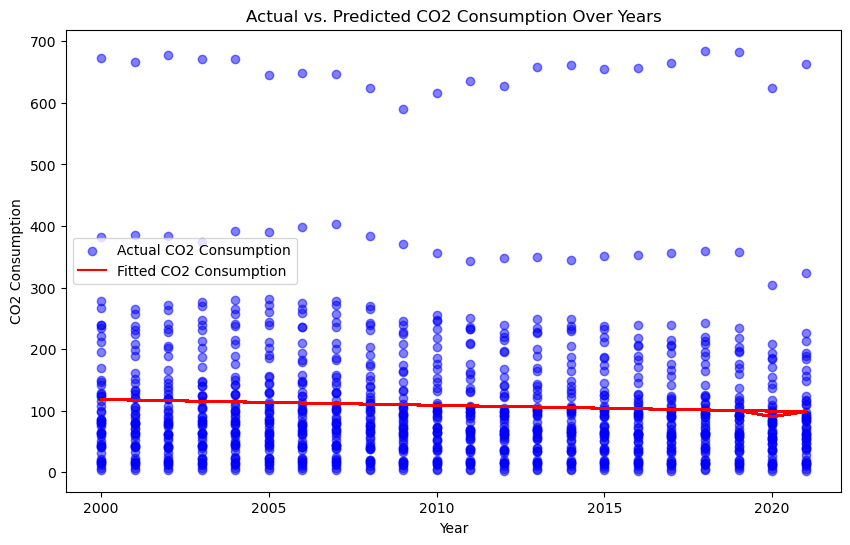

In [149]:
import matplotlib.pyplot as plt

# Add predicted values to the DataFrame
df['Predicted_CO2'] = results.fittedvalues

# Plotting actual vs. predicted CO2 consumption
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CO2_Consumption'], color='blue', alpha=0.5, label='Actual CO2 Consumption')
plt.plot(df['Year'], df['Predicted_CO2'], color='red', label='Fitted CO2 Consumption')
plt.title('Actual vs. Predicted CO2 Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('CO2 Consumption')
plt.legend()
plt.show()

Given the non-significant p-values for most coefficients, the very low explanatory power of the model (R-squared), and issues with autocorrelation and non-normal residuals, the current model is not robust or reliable for predicting or understanding changes in CO2 consumption over years and specifically in 2020. Consideration of additional variables, use of different modeling techniques (like time series analysis), or transformation of the data might be required to develop a more effective model.








So this model is bad
